In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Lead_Scoring_cleaned_data.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

Hypothesis for Lead Origin

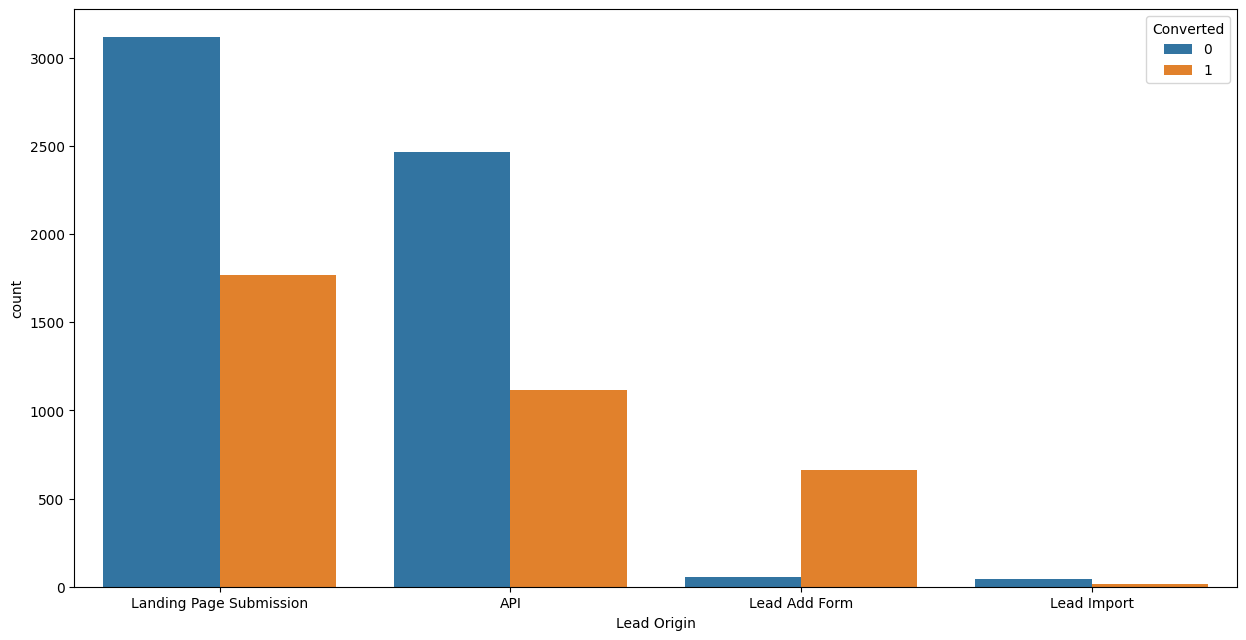

In [4]:
data['Lead Origin'].value_counts()

data.drop(data.index[data['Lead Origin'] == 'Quick Add Form'], inplace=True)

fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = data, order = data['Lead Origin'].value_counts().index)
plt.show()


Hypothesis for Lead Source

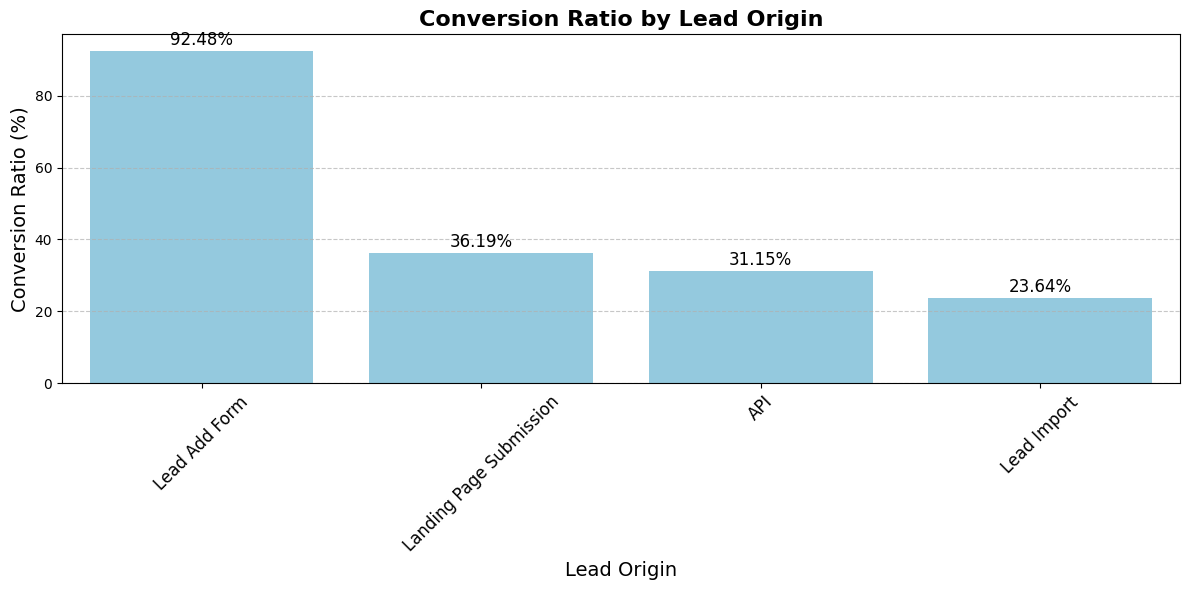

In [5]:
d = {}
for val in data['Lead Origin'].unique():
    converted_sum = data[data['Lead Origin'] == val]['Converted'].sum()
    total_leads = data[data['Lead Origin'] == val]['Converted'].count()
    not_converted = total_leads - converted_sum
    d[val] = [total_leads,converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]
df = pd.DataFrame.from_dict(d, orient='index').rename(
    columns={0: 'Leads', 1: 'Converted', 2: 'Not Converted', 3: 'Conversion Ratio'}
).sort_values(by=['Conversion Ratio'], ascending=False)


plt.figure(figsize=(12, 6))
sns.barplot(
    x=df.index, 
    y='Conversion Ratio', 
    data=df, 
    color='skyblue',  
    order=df.index 
)


plt.title('Conversion Ratio by Lead Origin', fontsize=16, fontweight='bold')
plt.xlabel('Lead Origin', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)

plt.xticks(rotation=45, fontsize=12)

for index, value in enumerate(df['Conversion Ratio']):
    plt.text(
        index,  
        value + 0.5,   
        f'{value}%', 
        ha='center',  
        va='bottom',
        fontsize=12
    )


plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

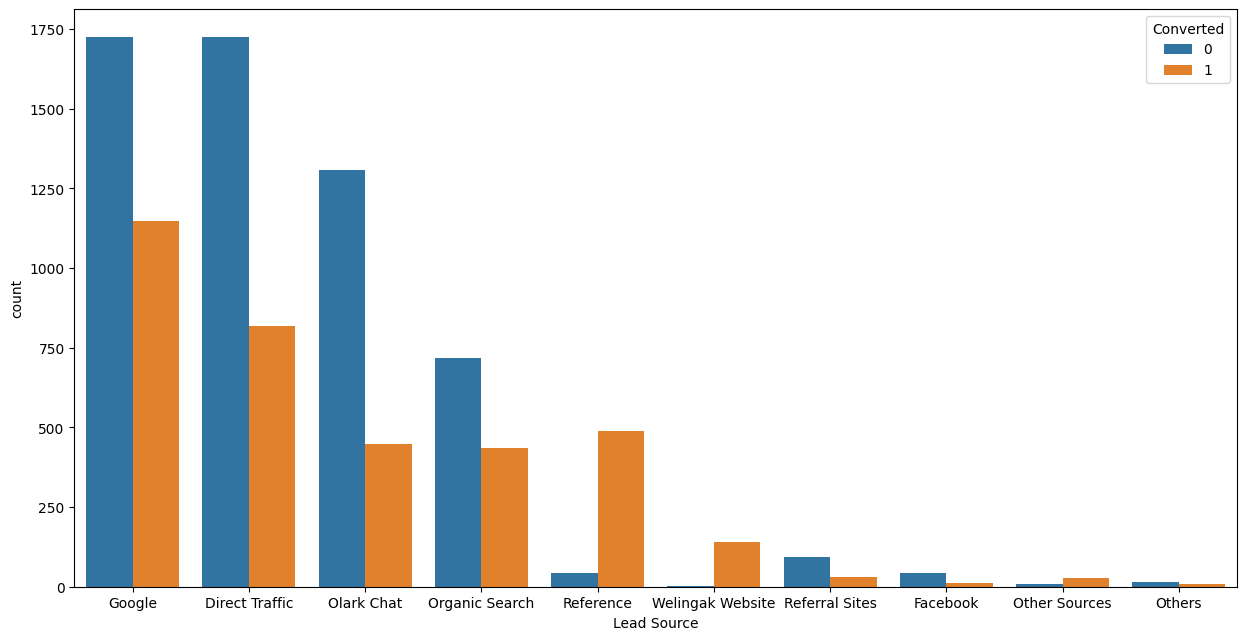

In [6]:
data['Lead Source'] = data['Lead Source'].replace(['google'], 'Google')
data['Lead Source'] = data['Lead Source'].replace(['Click2call','Live Chat','NC_EDM','Pay per Click Ads','Press_Release',
                    'Social Media','WeLearn','bing','blog','testone','welearnblog_Home','youtubechannel'], 'Others')

fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = data, order = data['Lead Source'].value_counts().index)
plt.show()

C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_10888\1909395388.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


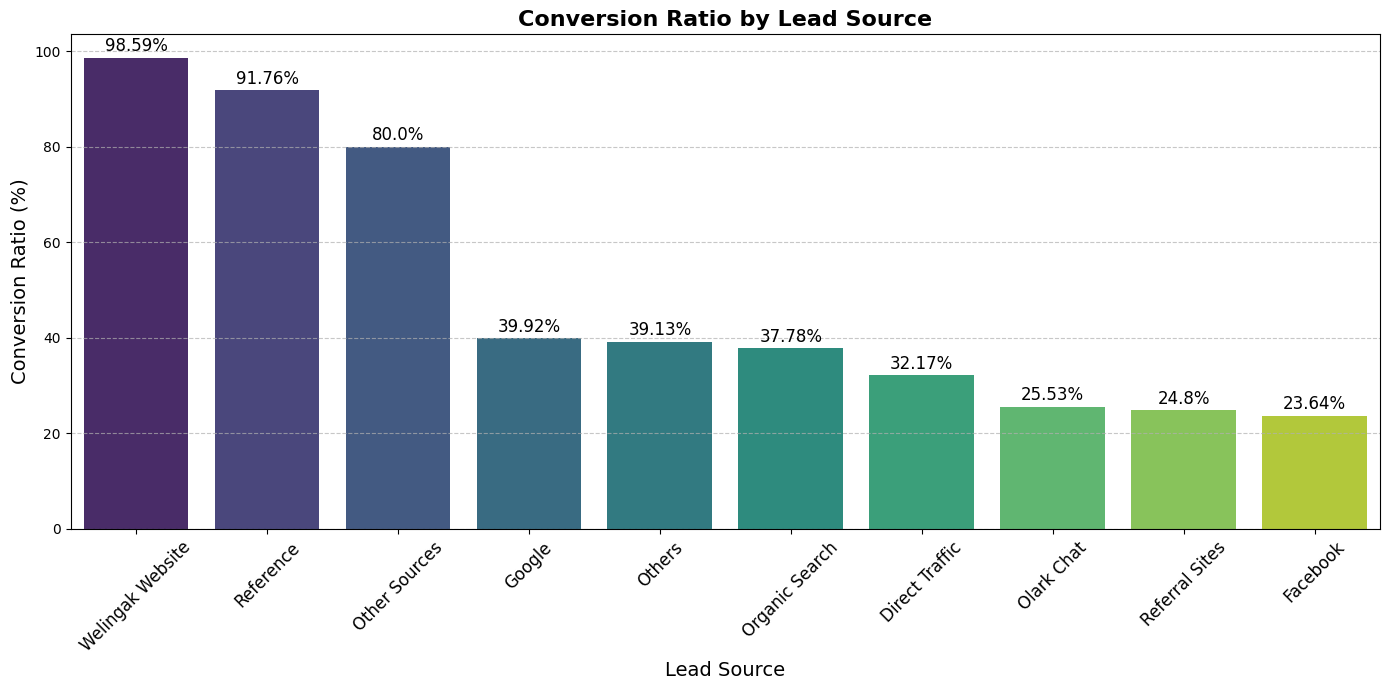

In [7]:
d = {}
for val in data['Lead Source'].unique():
    converted_sum = data[data['Lead Source'] == val]['Converted'].sum()
    total_leads = data[data['Lead Source'] == val]['Converted'].count()
    not_converted = total_leads - converted_sum
    d[val] = [total_leads,converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]


df = pd.DataFrame.from_dict(d, orient='index').rename(
    columns={0: 'Leads', 1: 'Converted', 2: 'Not Converted', 3: 'Conversion Ratio'}
).sort_values(by=['Conversion Ratio'], ascending=False)


plt.figure(figsize=(14, 7))
sns.barplot(
    x=df.index, 
    y='Conversion Ratio', 
    data=df, 
    palette='viridis',  
    order=df.index  
)


plt.title('Conversion Ratio by Lead Source', fontsize=16, fontweight='bold')
plt.xlabel('Lead Source', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)


plt.xticks(rotation=45, fontsize=12)

for index, value in enumerate(df['Conversion Ratio']):
    plt.text(
        index, 
        value + 0.5,  
        f'{value}%', 
        ha='center', 
        va='bottom', 
        fontsize=12
    )


plt.grid(True, axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()

plt.show()

In [8]:
data['Last Activity'].value_counts()

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    325
Email Link Clicked               267
Form Submitted on Website        116
Modified                         103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: count, dtype: int64

In [9]:
data['What is your current occupation'].value_counts()

What is your current occupation
Unemployed              5599
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: count, dtype: int64

HYPOTHESIS FOR OCCUPATION WISE CONVERSION RATIO

In [10]:
d = {}
for val in data['What is your current occupation'].unique():
    converted_sum = data[data['What is your current occupation'] == val]['Converted'].sum()
    total_leads = data[data['What is your current occupation'] == val]['Converted'].count()
    not_converted = total_leads - converted_sum
    d[val] = [total_leads,converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]

pd.DataFrame.from_dict(d, orient='index').rename(columns={0: 'Leads', 1: 'Converted', 2: 'Not Converted', 3: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Leads,Converted,Not Converted,Conversion Ratio
Housewife,10,10,0,100.00
Working Professional,706,647,59,91.64
Businessman,8,5,3,62.50
Unemployed,5599,2440,3159,43.58
Student,210,78,132,37.14
Other,2706,380,2326,14.04


C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_10888\1898334558.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='Conversion Ratio', y='Occupation', palette='viridis')


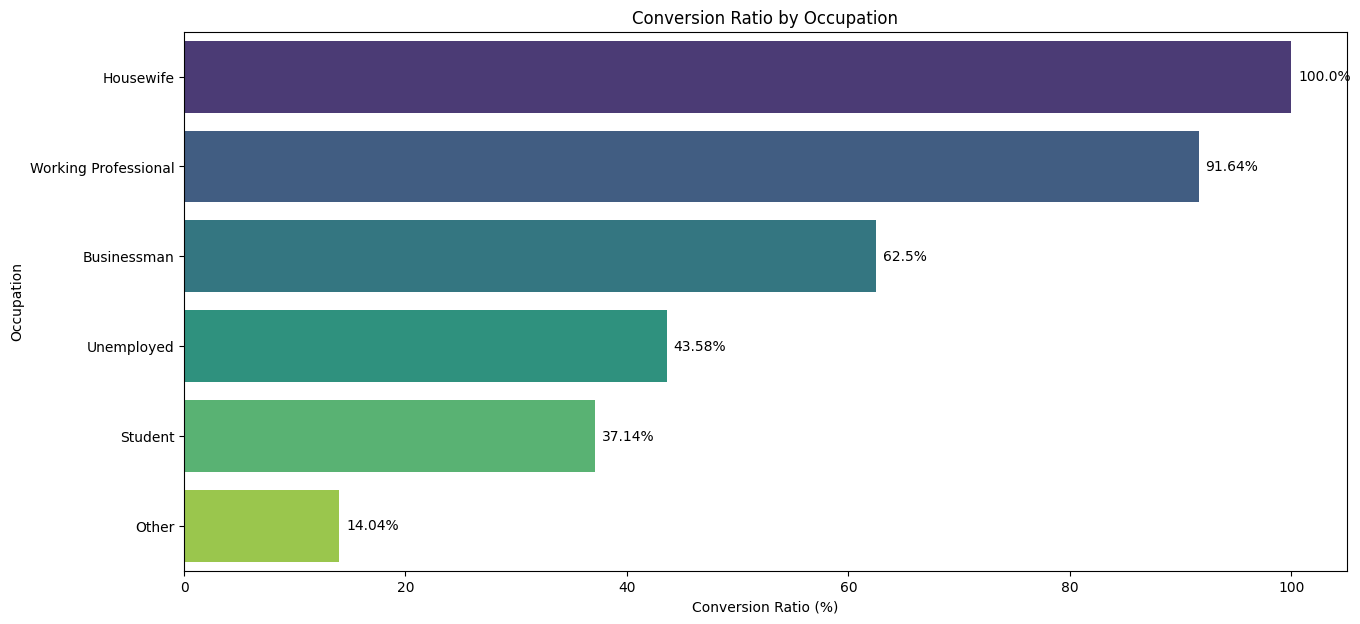

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(d, orient='index', columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio']).sort_values(by=['Conversion Ratio'], ascending=False)
df.reset_index(inplace=True)
df.rename(columns={'index': 'Occupation'}, inplace=True)


columns = ['Occupation', 'Leads', 'Converted', 'Not Converted', 'Conversion Ratio']
df = df[columns]
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=df, x='Conversion Ratio', y='Occupation', palette='viridis')

for index, row in df.iterrows():
    ax.annotate(f"{row['Conversion Ratio']}%", 
                xy=(row['Conversion Ratio'], index), 
                xytext=(5, 0),  
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=10, 
                color='black')

plt.title('Conversion Ratio by Occupation')
plt.xlabel('Conversion Ratio (%)')
plt.ylabel('Occupation')
plt.show()

HYPOTHESIS FOR SPECIALIZATION WISE CONVERSION RATIO

In [12]:
d = {}
for val in data['Specialization'].unique():
    converted_sum = data[data['Specialization'] == val]['Converted'].sum()
    total_leads = data[data['Specialization'] == val]['Converted'].count()
    not_converted = total_leads - converted_sum
    d[val] = [total_leads,converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]

pd.DataFrame.from_dict(d, orient='index').rename(columns={0: 'Leads', 1: 'Converted', 2: 'Not Converted', 3: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Leads,Converted,Not Converted,Conversion Ratio
Healthcare Management,159,79,80,49.69
"Banking, Investment And Insurance",338,167,171,49.41
Marketing Management,872,427,445,48.97
Operations Management,503,238,265,47.32
Human Resource Management,848,388,460,45.75
Business Administration,403,179,224,44.42
Supply Chain Management,349,151,198,43.27
Finance Management,2889,1234,1655,42.71
Rural and Agribusiness,73,31,42,42.47
Hospitality Management,114,48,66,42.11


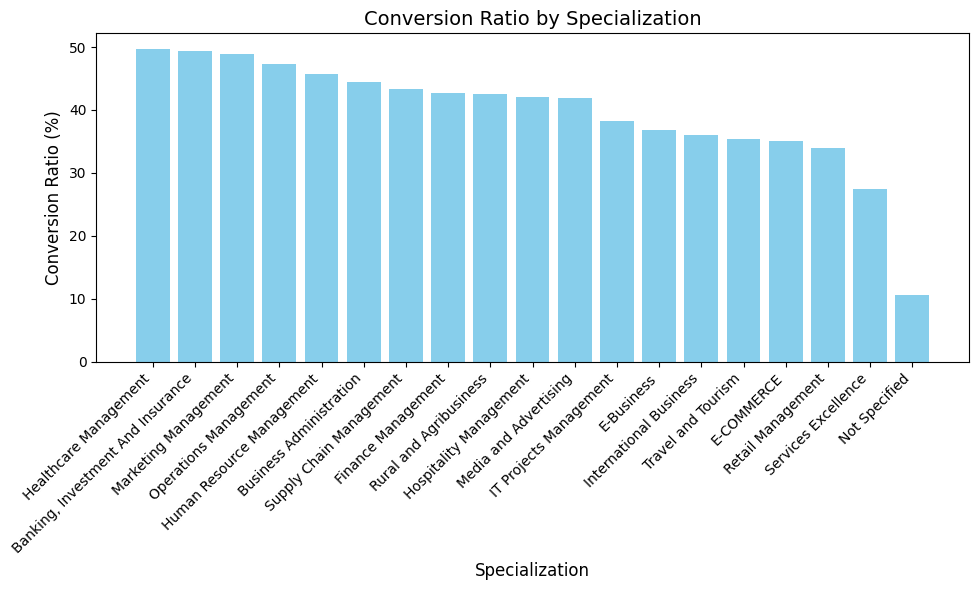

In [13]:
import matplotlib.pyplot as plt

# Existing code
d = {}
for val in data['Specialization'].unique():
    converted_sum = data[data['Specialization'] == val]['Converted'].sum()
    total_leads = data[data['Specialization'] == val]['Converted'].count()
    not_converted = total_leads - converted_sum
    d[val] = [total_leads, converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]

df = pd.DataFrame.from_dict(d, orient='index').rename(
    columns={0: 'Leads', 1: 'Converted', 2: 'Not Converted', 3: 'Conversion Ratio'}
).sort_values(by=['Conversion Ratio'], ascending=False)


# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df.index, df['Conversion Ratio'], color='skyblue')
plt.xlabel('Specialization', fontsize=12)
plt.ylabel('Conversion Ratio (%)', fontsize=12)
plt.title('Conversion Ratio by Specialization', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

HYPOTHESIS FOR CITY WISE CONVERSION RATIO

In [14]:
d = {}
for val in data['City'].unique():
    converted_sum = data[data['City'] == val]['Converted'].sum()
    total_leads = data[data['City'] == val]['Converted'].count()
    not_converted = total_leads - converted_sum
    d[val] = [total_leads,converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]

pd.DataFrame.from_dict(d, orient='index').rename(columns={0: 'Leads', 1: 'Converted', 2: 'Not Converted', 3: 'Conversion Ratio'}).sort_values(by=['Conversion Ratio'], ascending=False)


,Leads,Converted,Not Converted,Conversion Ratio
Select,2249,1103,1146,49.04
Thane & Outskirts,752,338,414,44.95
Other Cities of Maharashtra,457,201,256,43.98
Other Metro Cities,379,154,225,40.63
Other Cities,692,277,415,40.03
Mumbai,3791,1396,2395,36.82
Tier II Cities,74,25,49,33.78
Unknown City,845,66,779,7.81


C:\Users\TottaraDhanush\AppData\Local\Temp\ipykernel_10888\4075499678.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=city_df.reset_index(), x='Conversion Ratio', y='index', palette='coolwarm')


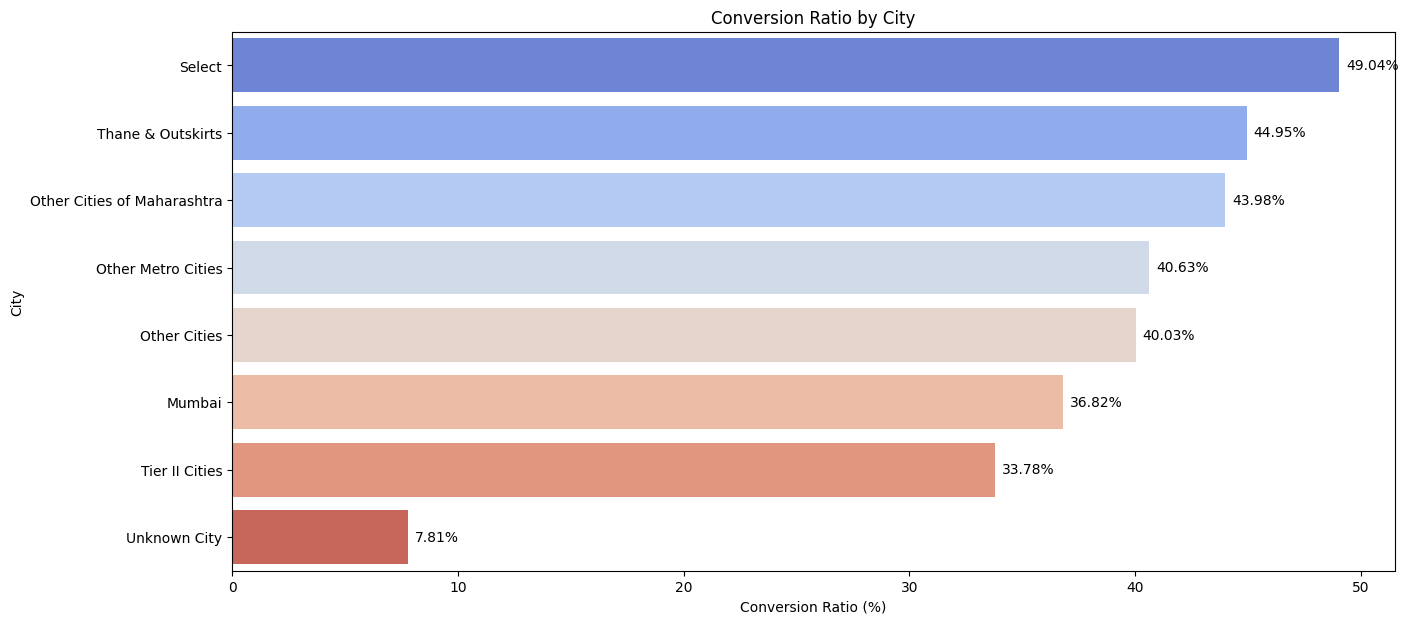

In [15]:
# Group data by City and calculate conversion metrics
city_data = {}
for city in data['City'].unique():
    converted_sum = data[data['City'] == city]['Converted'].sum()
    total_leads = data[data['City'] == city]['Converted'].count()
    not_converted = total_leads - converted_sum
    city_data[city] = [total_leads, converted_sum, not_converted, round(converted_sum / total_leads * 100, 2)]

# Create a DataFrame from the city data
city_df = pd.DataFrame.from_dict(city_data, orient='index', columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio']).sort_values(by=['Conversion Ratio'], ascending=False)

# Plot the conversion ratio by city
plt.figure(figsize=(15, 7))
ax = sns.barplot(data=city_df.reset_index(), x='Conversion Ratio', y='index', palette='coolwarm')
plt.title('Conversion Ratio by City')
plt.xlabel('Conversion Ratio (%)')
plt.ylabel('City')

# Annotate the bars with conversion ratios
for index, row in city_df.reset_index().iterrows():
    ax.annotate(f"{row['Conversion Ratio']}%", 
                xy=(row['Conversion Ratio'], index), 
                xytext=(5, 0),  
                textcoords='offset points', 
                ha='left', 
                va='center', 
                fontsize=10, 
                color='black')

plt.show()

HYPOTHESIS FOR LEAD QUALITY

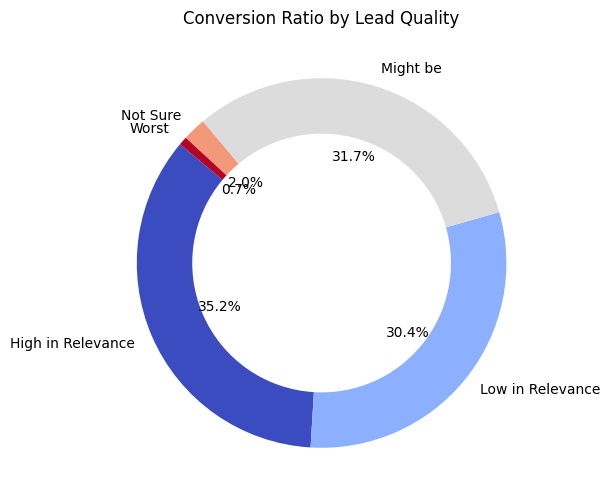

In [16]:
# Calculate the conversion ratio for each Lead Quality
lead_quality_data = data.groupby('Lead Quality')['Converted'].sum() / data.groupby('Lead Quality')['Converted'].count() * 100

# Plot the doughnut chart
plt.figure(figsize=(10, 6))
lead_quality_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='coolwarm', wedgeprops=dict(width=0.3))
plt.title('Conversion Ratio by Lead Quality')
plt.ylabel('')  # Remove y-axis label for better visualization
plt.show()


HYPOTHESIS FOR CONVERSION BY FREE COPY OF MASTERING THE INTERVIEW

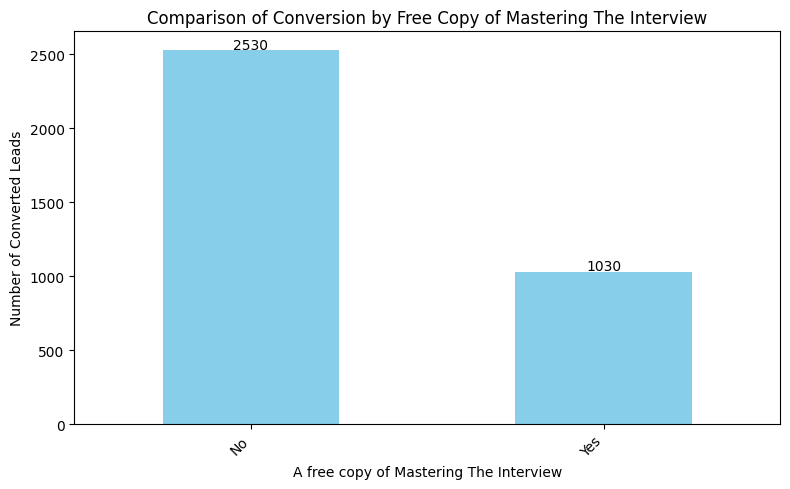

In [17]:
# Group by 'A free copy of Mastering The Interview' and calculate the sum of 'Converted'
comparison_data = data.groupby('A free copy of Mastering The Interview')['Converted'].sum()

# Plot the bar chart
plt.figure(figsize=(8, 5))

# Annotate each bar with the count of converted leads
for index, value in enumerate(comparison_data):
    plt.text(index, value + 10, f"{value}", ha='center', fontsize=10)
comparison_data.plot(kind='bar', color='skyblue')
plt.title('Comparison of Conversion by Free Copy of Mastering The Interview')
plt.xlabel('A free copy of Mastering The Interview')
plt.ylabel('Number of Converted Leads')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, Healthcare Management to Not Specified
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Leads             19 non-null     int64  
 1   Converted         19 non-null     int64  
 2   Not Converted     19 non-null     int64  
 3   Conversion Ratio  19 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 760.0+ bytes


  Visit Range  Leads  Converted  Not Converted  Conversion Ratio
0         0-5   7610       2863           4747             37.62
1        6-10   1277        533            744             41.74
2       11-15    233        117            116             50.21
3       16-20     73         28             45             38.36
4         20+     47         20             27             42.55


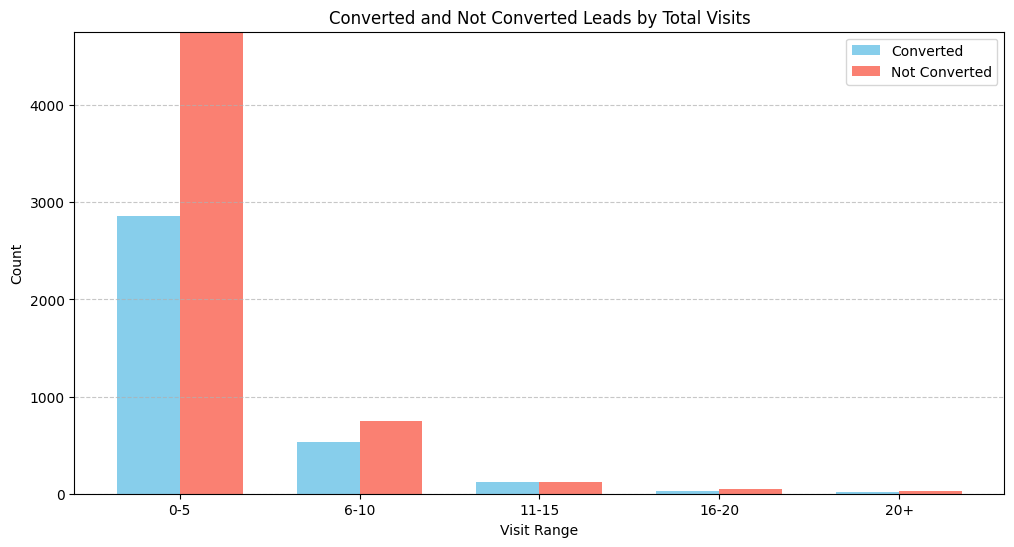

In [19]:
# Hypothesis : If a not paying customer has more visits then he can be converted to paying customer

df=pd.read_csv('Lead_Scoring_cleaned_data.csv') 
 
# Define visit ranges as specified
bins = [0, 6, 11, 16, 21, float('inf')]  # Define the ranges
labels = ['0-5', '6-10', '11-15', '16-20', '20+']  # Labels for the ranges
 
# Create a new column for visit ranges
df['Visit Range'] = pd.cut(df['TotalVisits'], bins=bins, labels=labels, right=False)
 
# Initialize a dictionary to hold the summary data
summary_data = {}
 
# Calculate the summary for each visit range
for val in labels:  # Iterate over the defined labels to ensure all ranges are included
    converted_sum = df[df['Visit Range'] == val]['Converted'].sum()  # Sum of converted leads
    total_leads = df[df['Visit Range'] == val]['Converted'].count()  # Total leads in the range
    not_converted = total_leads - converted_sum  # Calculate not converted leads
    conversion_ratio = round(converted_sum / total_leads * 100, 2) if total_leads > 0 else 0  # Conversion ratio
    summary_data[val] = [total_leads, converted_sum, not_converted, conversion_ratio]  # Store in dictionary
 
# Create a DataFrame from the summary data
summary_df = pd.DataFrame.from_dict(summary_data, orient='index',
                                     columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio'])
 
# Reset index for plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Visit Range'}, inplace=True)
 
# Sort the DataFrame by Conversion Ratio in descending order
summary_df_sorted = summary_df.sort_values(by='Conversion Ratio', ascending=False)
 
# Print the summary DataFrame to check the counts
print(summary_df)
 
# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
bar_width = 0.35  # Width of the bars
x = range(len(summary_df))  # X locations for the groups
 
# Create bars for converted and not converted
plt.bar(x, summary_df['Converted'], width=bar_width, label='Converted', color='skyblue')  # Converted leads
plt.bar([p + bar_width for p in x], summary_df['Not Converted'], width=bar_width, label='Not Converted', color='salmon')  # Not converted leads
 
# Adding labels and title
plt.title('Converted and Not Converted Leads by Total Visits')  # Title of the plot
plt.xlabel('Visit Range')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks([p + bar_width / 2 for p in x], summary_df['Visit Range'])  # Center the x-ticks
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, summary_df[['Converted', 'Not Converted']].max().max() + 10)  # Set y-axis limit for better visibility
 
plt.show()  # Display the plot

  Time Spent  Leads  Converted  Not Converted  Conversion Ratio
3  1501-2000    575        411            164             71.48
2  1001-1500   1528       1053            475             68.91
4      2000+     22         15              7             68.18
1   501-1000   1042        599            443             57.49
0      0-500   6073       1483           4590             24.42


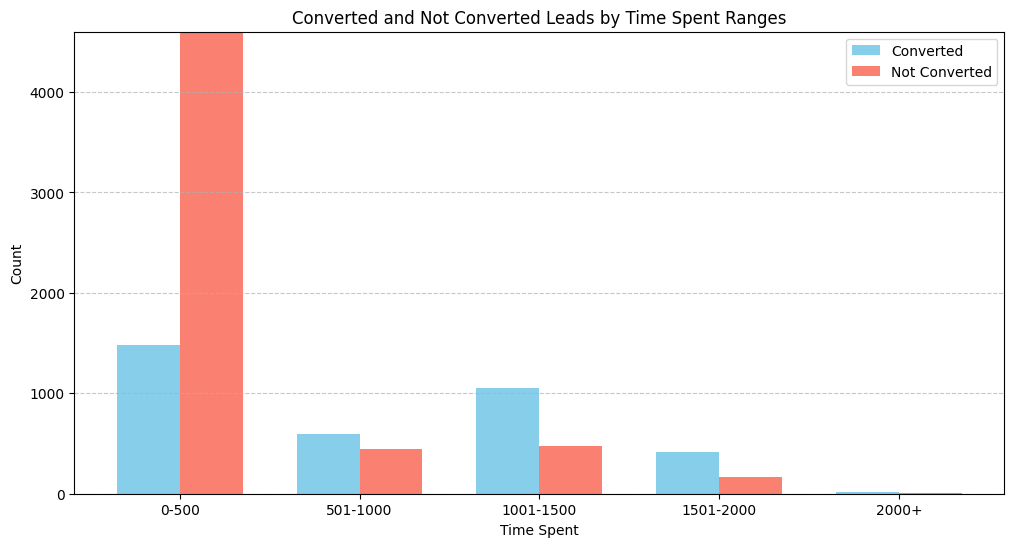

In [20]:
# Hypothesis: If a non-paying customer has spent time on website greater than 1000 then he can be converted to paying customer
 
bins = [0, 501, 1001, 1501, 2001, float('inf')]  # Define the ranges
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2000+']  # Labels for the ranges
 
# Create a new column for visit ranges
df['Time Spent'] = pd.cut(df['Total Time Spent on Website'], bins=bins, labels=labels, right=False)
 
# print(df['Visit Range'])
 
# Step 6: Initialize a dictionary to hold the summary data
summary_data = {}
 
# Calculate the summary for each visit range
for val in labels:  # Iterate over the defined labels to ensure all ranges are included
    converted_sum = df[df['Time Spent'] == val]['Converted'].sum()  # Sum of converted leads
    total_leads = df[df['Time Spent'] == val]['Converted'].count()  # Total leads in the range
    not_converted = total_leads - converted_sum  # Calculate not converted leads
    conversion_ratio = round(converted_sum / total_leads * 100, 2) if total_leads > 0 else 0  # Conversion ratio
    summary_data[val] = [total_leads, converted_sum, not_converted, conversion_ratio]  # Store in dictionary
 
# Create a DataFrame from the summary data
summary_df = pd.DataFrame.from_dict(summary_data, orient='index',
                                     columns=['Leads', 'Converted', 'Not Converted', 'Conversion Ratio'])
 
# Reset index for plotting
summary_df.reset_index(inplace=True)
summary_df.rename(columns={'index': 'Time Spent'}, inplace=True)
 
# Sort the DataFrame by Conversion Ratio in descending order
summary_df_sorted = summary_df.sort_values(by='Conversion Ratio', ascending=False)
 
# Print the summary DataFrame to check the counts
print(summary_df_sorted)
 
# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))  # Set the figure size
bar_width = 0.35  # Width of the bars
x = range(len(summary_df))  # X locations for the groups
 
# Create bars for converted and not converted
plt.bar(x, summary_df['Converted'], width=bar_width, label='Converted', color='skyblue')  # Converted leads
plt.bar([p + bar_width for p in x], summary_df['Not Converted'], width=bar_width, label='Not Converted', color='salmon')  # Not converted leads
 
# Adding labels and title
plt.title('Converted and Not Converted Leads by Time Spent Ranges')  # Title of the plot
plt.xlabel('Time Spent')  # X-axis label
plt.ylabel('Count')  # Y-axis label
plt.xticks([p + bar_width / 2 for p in x], summary_df['Time Spent'])  # Center the x-ticks
plt.legend()  # Show legend
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines
plt.ylim(0, summary_df[['Converted', 'Not Converted']].max().max() + 10)  # Set y-axis limit for better visibility
plt.show()  # Display the plot

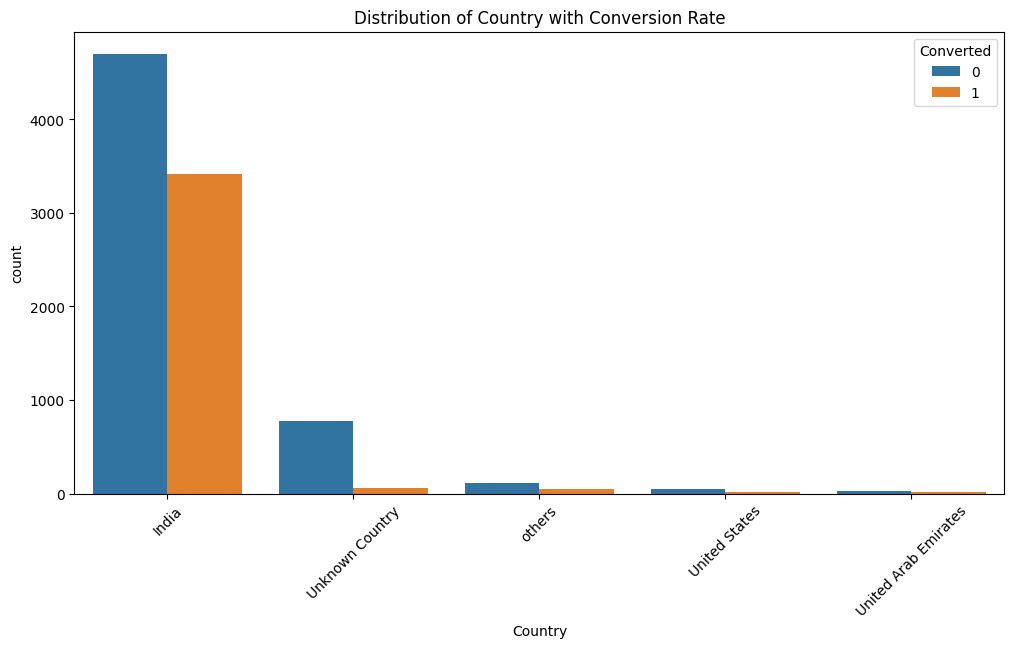

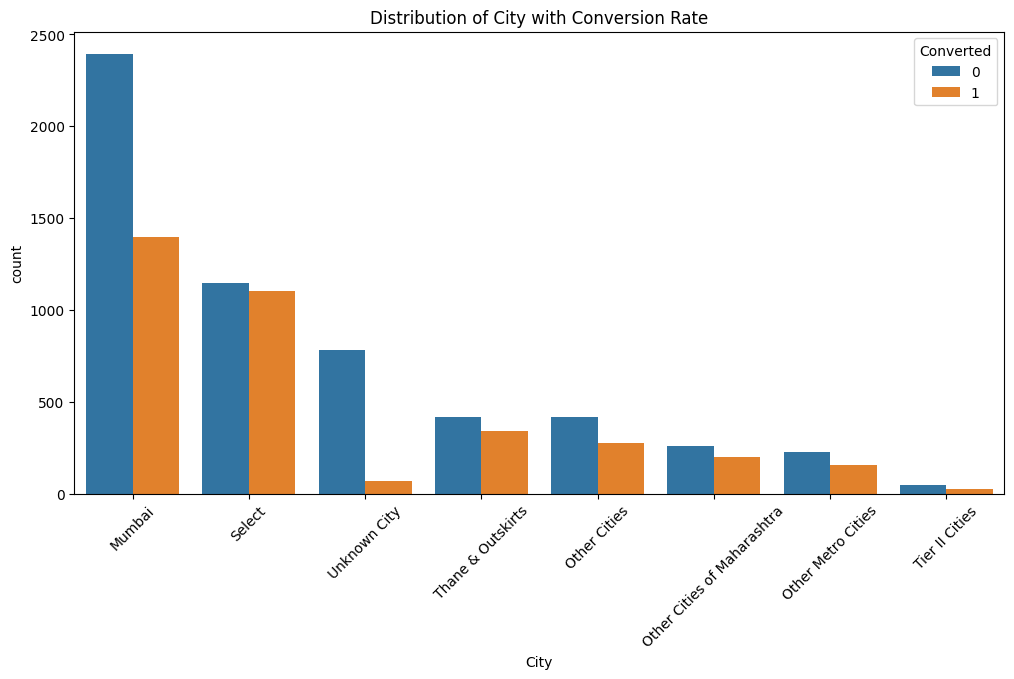

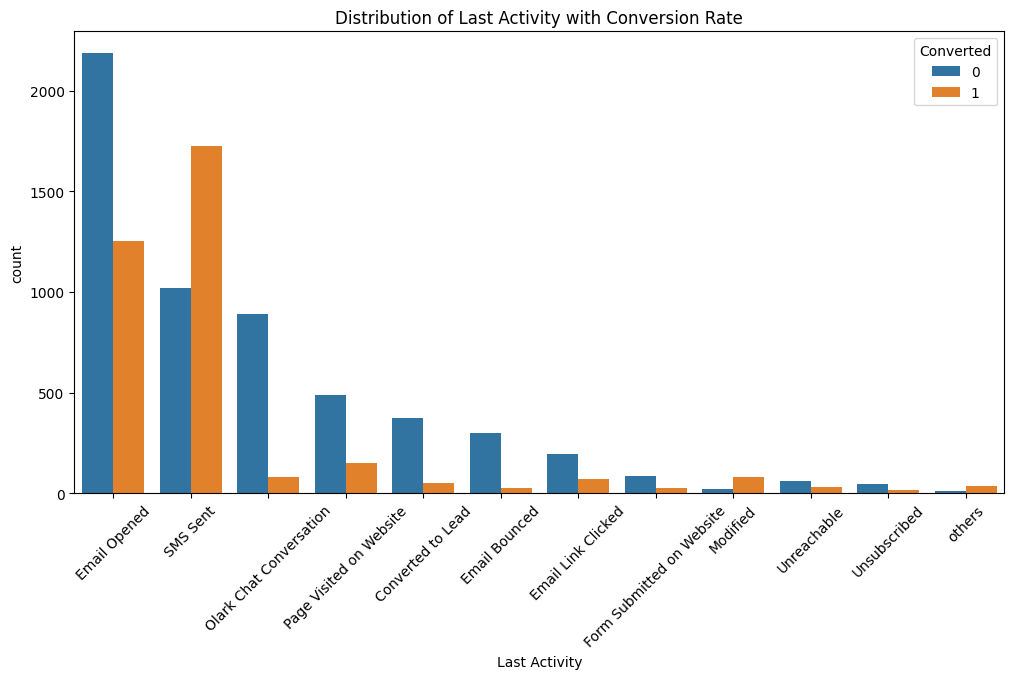

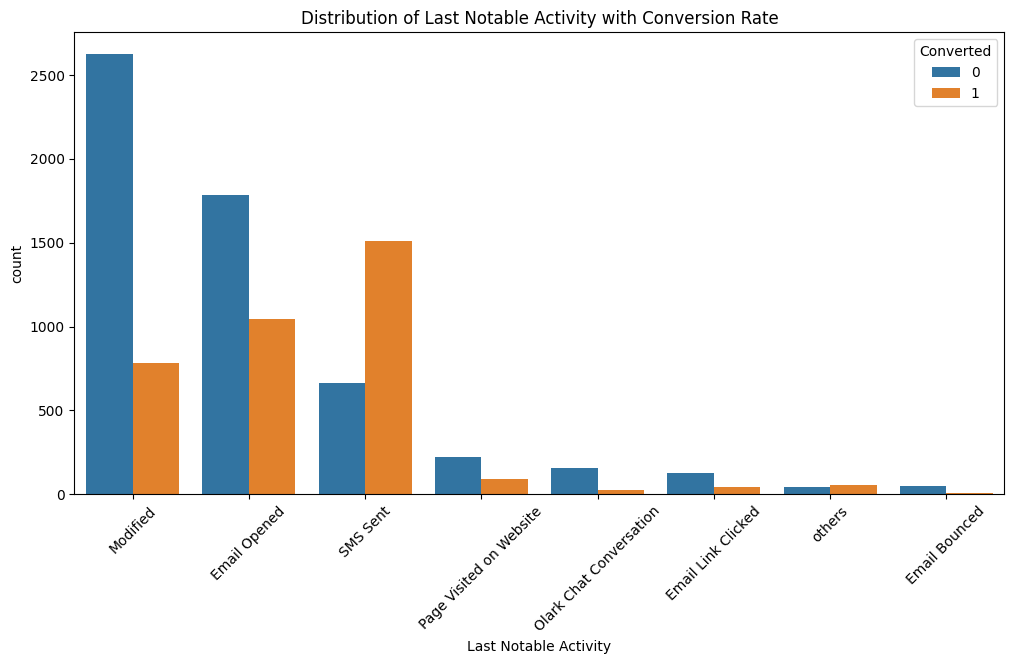

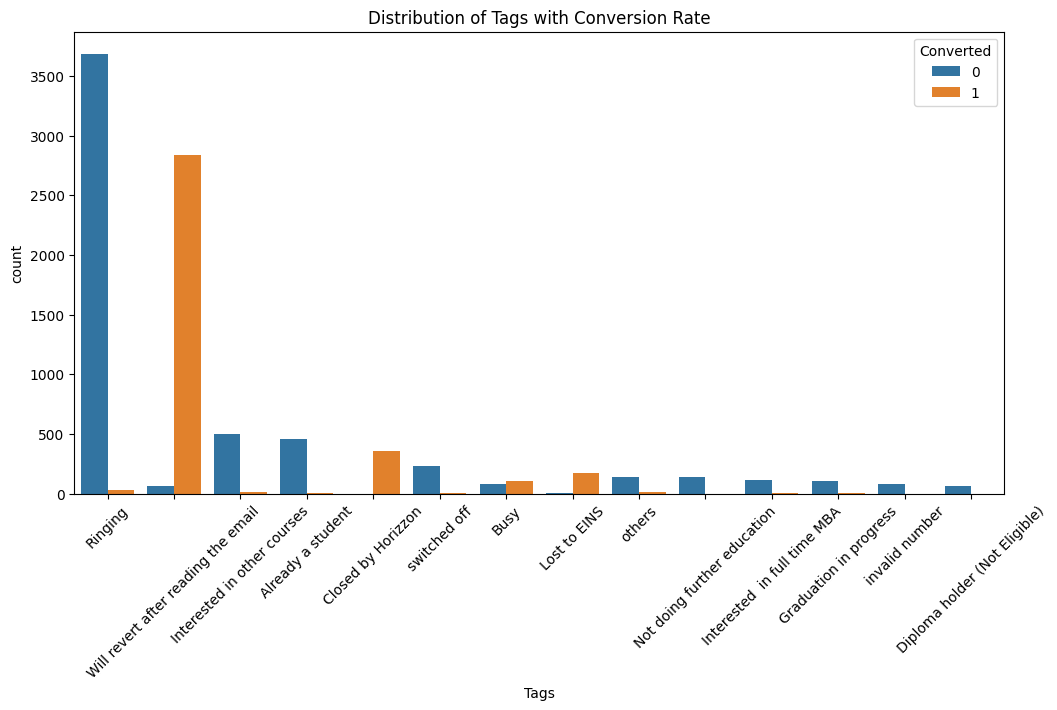

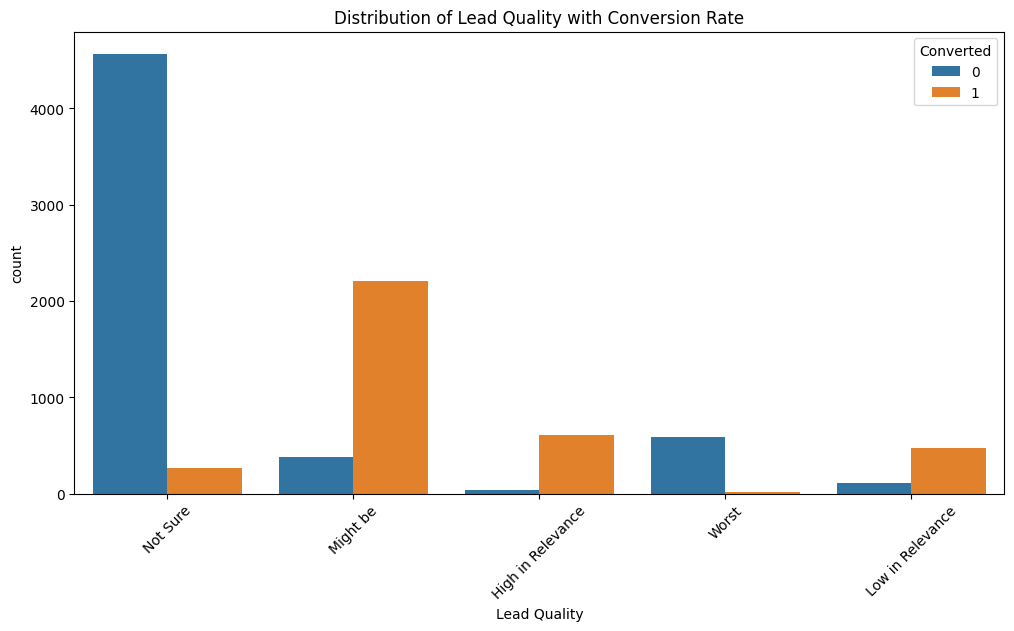

In [21]:
# Function to group less frequent categories
def group_rare_categories(column, threshold=50):
    value_counts = data[column].value_counts()
    rare_categories = value_counts[value_counts < threshold].index
    data[column] = data[column].apply(lambda x: "others" if x in rare_categories else x)

# Apply grouping to categorical columns
categorical_columns = ["Country", "City", "Last Activity", "Last Notable Activity", "Tags", "Lead Quality"]
for col in categorical_columns:
    group_rare_categories(col)

# Function to plot categorical variables against Conversion Rate
def plot_categorical_distribution(column):
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=column, data=data, order=data[column].value_counts().index, hue=data['Converted'])
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {column} with Conversion Rate")
    plt.show()

# Plot for each categorical variable
for col in categorical_columns:
    plot_categorical_distribution(col)

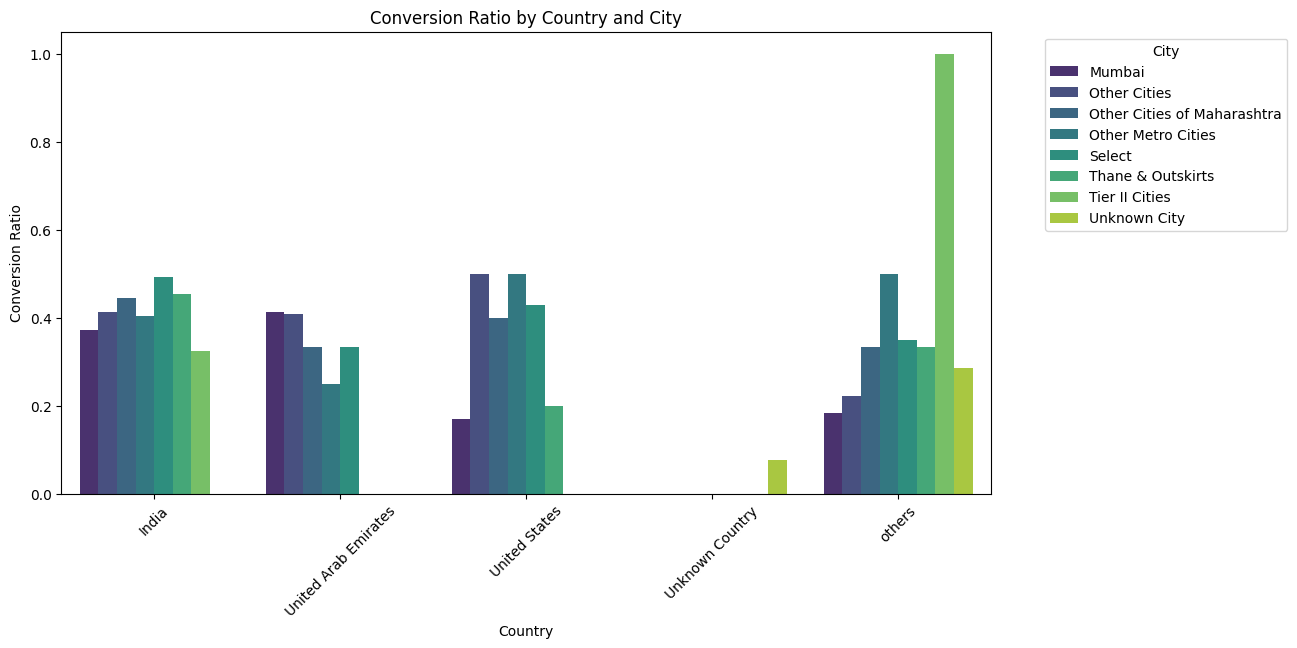

In [22]:
# Grouping by Country and City to calculate conversion rate
grouped = data.groupby(["Country", "City"]).Converted.mean().reset_index()

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="Country", y="Converted", hue="City", data=grouped, palette="viridis")
plt.title("Conversion Ratio by Country and City")
plt.ylabel("Conversion Ratio")
plt.xlabel("Country")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


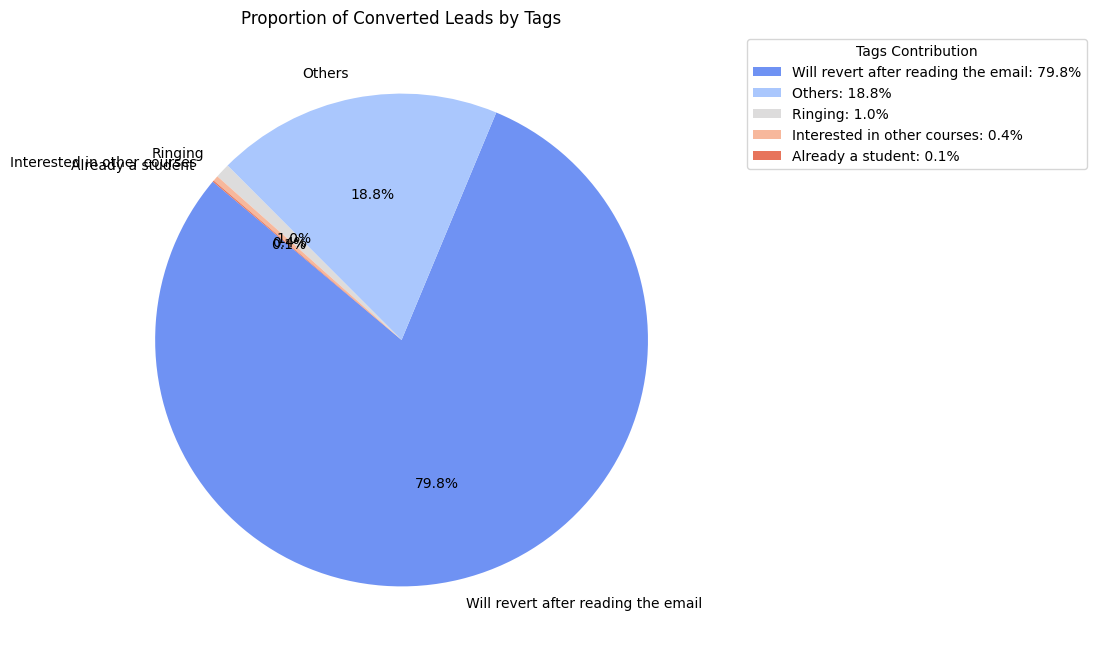

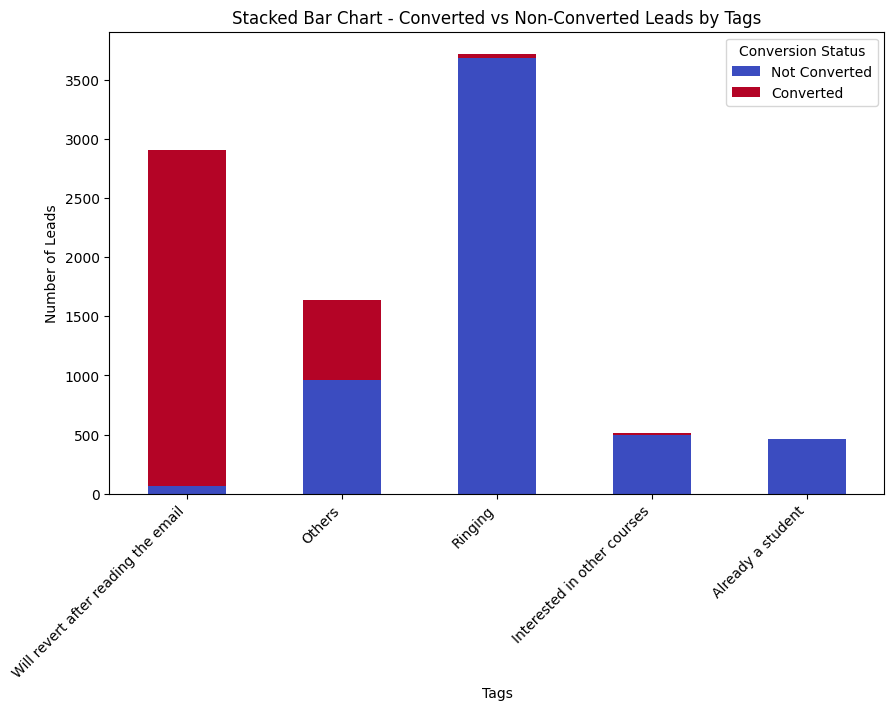

In [23]:
threshold = 0.05  # Adjust percentage as needed
tag_counts = data['Tags'].value_counts(normalize=True)  # Get proportion of each category
common_tags = tag_counts[tag_counts > threshold].index  # Select frequent categories
data['Tags'] = data['Tags'].apply(lambda x: x if x in common_tags else 'Others')

# Calculate conversion counts for each Tag
tags_conversion = data.groupby(['Tags', 'Converted']).size().unstack().fillna(0)

# --- 1. Improved Pie Chart for Conversion Ratio with Legend ---
plt.figure(figsize=(8, 8))
converted_counts = data[data['Converted'] == 1]['Tags'].value_counts()

# Compute percentages for the legend
total_converted = converted_counts.sum()
legend_labels = [f"{tag}: {count / total_converted * 100:.1f}%" for tag, count in converted_counts.items()]

# Plot Pie Chart
wedges, texts, autotexts = plt.pie(
    converted_counts, labels=converted_counts.index, autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm', len(converted_counts)), startangle=140
)

# Adjust legend to show percentages
plt.legend(wedges, legend_labels, title="Tags Contribution", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Proportion of Converted Leads by Tags")
plt.show()

# --- 2. Improved Stacked Bar Chart with Conversion Contribution in Legend ---
tags_conversion = tags_conversion.sort_values(by=1, ascending=False)  # Sort by conversion count

# Calculate percentage of conversions for legend
conversion_percentages = (tags_conversion[1] / tags_conversion.sum(axis=1)) * 100
legend_labels_bar = [f"{tag}: {pct:.1f}%" for tag, pct in zip(tags_conversion.index, conversion_percentages)]

# Plot Stacked Bar Chart
ax = tags_conversion.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Stacked Bar Chart - Converted vs Non-Converted Leads by Tags")
plt.ylabel("Number of Leads")
plt.xlabel("Tags")
plt.xticks(rotation=45, ha='right')

# Custom legend with conversion percentages
handles, _ = ax.get_legend_handles_labels()
plt.legend(handles, ["Not Converted", "Converted"], title="Conversion Status", loc="upper right")

plt.show()

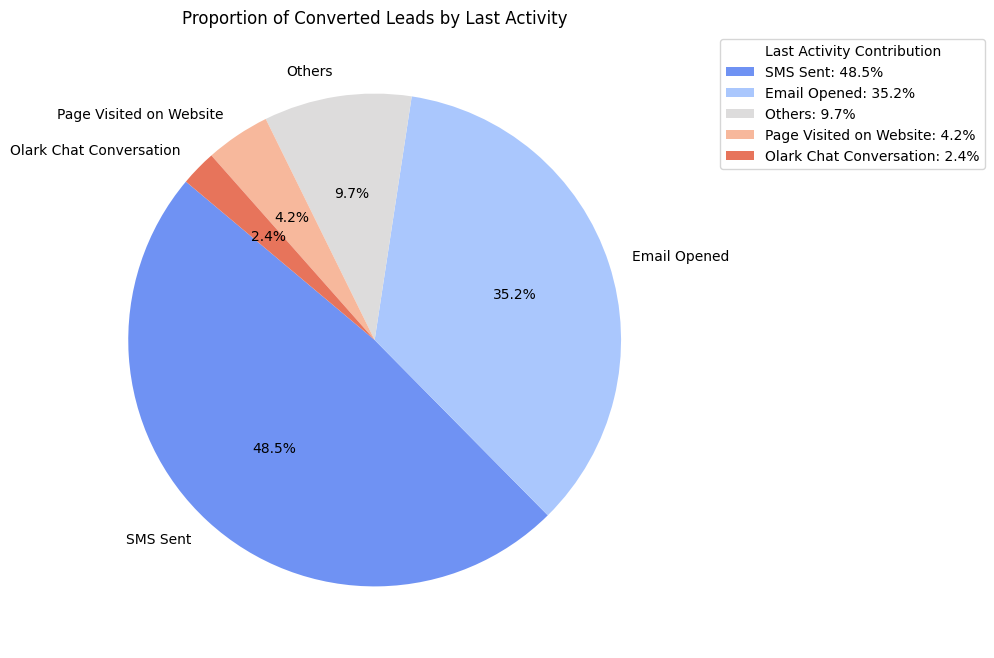

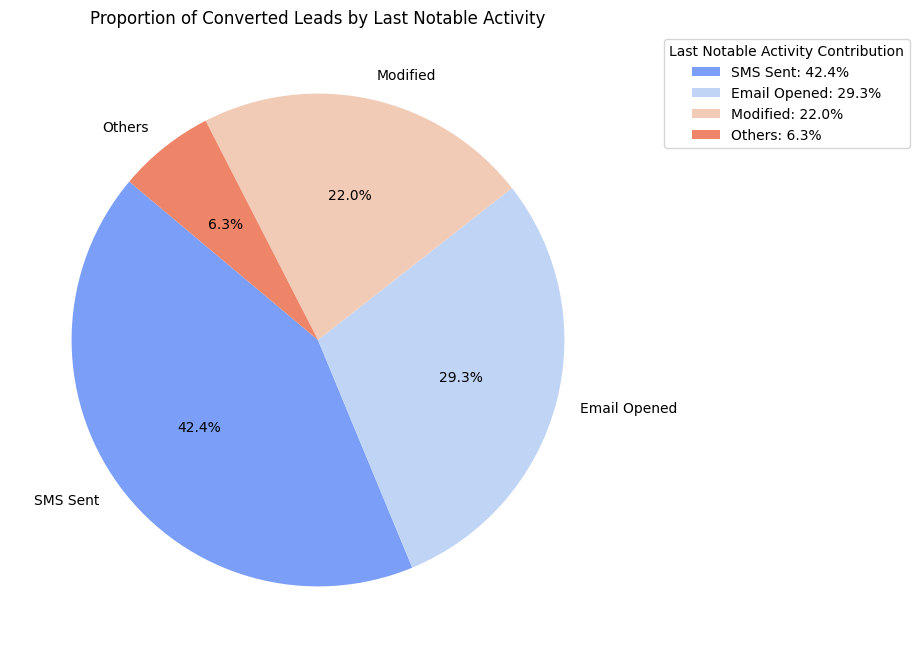

In [24]:
# --- Group less frequent values into "Others" dynamically ---
def group_categories(data, column, threshold=0.05):
    value_counts = data[column].value_counts(normalize=True)
    common_values = value_counts[value_counts > threshold].index
    data[column] = data[column].apply(lambda x: x if x in common_values else 'Others')
    return data

data = group_categories(data, 'Last Activity')
data = group_categories(data, 'Last Notable Activity')

# --- Calculate conversion counts ---
last_activity_conversion = data.groupby(['Last Activity', 'Converted']).size().unstack().fillna(0)
notable_activity_conversion = data.groupby(['Last Notable Activity', 'Converted']).size().unstack().fillna(0)

# --- 1. Pie Chart for Last Activity Conversion Ratio ---
plt.figure(figsize=(8, 8))
converted_counts = data[data['Converted'] == 1]['Last Activity'].value_counts()
total_converted = converted_counts.sum()
legend_labels = [f"{activity}: {count / total_converted * 100:.1f}%" for activity, count in converted_counts.items()]
wedges, texts, autotexts = plt.pie(
    converted_counts, labels=converted_counts.index, autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm', len(converted_counts)), startangle=140
)
plt.legend(wedges, legend_labels, title="Last Activity Contribution", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Proportion of Converted Leads by Last Activity")
plt.show()


# --- 2. Pie Chart for Last Notable Activity ---
plt.figure(figsize=(8, 8))
converted_counts = data[data['Converted'] == 1]['Last Notable Activity'].value_counts()
total_converted = converted_counts.sum()
legend_labels = [f"{activity}: {count / total_converted * 100:.1f}%" for activity, count in converted_counts.items()]
wedges, texts, autotexts = plt.pie(
    converted_counts, labels=converted_counts.index, autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm', len(converted_counts)), startangle=140
)
plt.legend(wedges, legend_labels, title="Last Notable Activity Contribution", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Proportion of Converted Leads by Last Notable Activity")
plt.show()
